In [2]:
import numpy as np

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
path = 'CANDY-HIERARCHY-2015-SURVEY-Responses.csv'
dt = pd.read_csv(path)
dt.head()

,Timestamp,How old are you?,Are you going actually going trick or treating yourself?,[Butterfinger],[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],[Bonkers],[Bottle Caps],...,[Necco Wafers],"Which day do you prefer, Friday or Sunday?",Please estimate the degrees of separation you have from the following folks [Bruce Lee],Please estimate the degrees of separation you have from the following folks [JK Rowling],Please estimate the degrees of separation you have from the following folks [Malala Yousafzai],Please estimate the degrees of separation you have from the following folks [Thom Yorke],Please estimate the degrees of separation you have from the following folks [JJ Abrams],Please estimate the degrees of separation you have from the following folks [Hillary Clinton],Please estimate the degrees of separation you have from the following folks [Donald Trump],Please estimate the degrees of separation you have from the following folks [Beyoncé Knowles]
0,10/23/2015 8:46:20,35,No,JOY,NaN,DESPAIR,JOY,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/23/2015 8:46:52,41,No,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,...,DESPAIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/23/2015 8:47:34,33,No,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,...,DESPAIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/23/2015 8:47:59,31,No,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,...,DESPAIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/23/2015 8:48:12,30,No,NaN,JOY,DESPAIR,JOY,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dt.columns[0]

'Timestamp'

In [5]:
#yes
trick = dt[dt.columns[2]]
trick.value_counts()["Yes"]/sum(trick.value_counts())

0.09431616341030195

In [6]:
# Joy occurence, [0] is joy, [1] is despair WRONG, the most goes first, nvm just do sort=false 
listofpercents = []
for i in range(3,96):
    filler = dt[dt.columns[i]].dropna()
    joyspercent = filler.value_counts()["JOY"]/sum(filler.value_counts())
    listofpercents.append(joyspercent)
    print(dt.columns[i],joyspercent)
    print(filler.value_counts())
    print()

 [Butterfinger] 0.7869258623975605
JOY        4129
DESPAIR    1118
Name:  [Butterfinger], dtype: int64

 [100 Grand Bar] 0.6897868918375553
JOY        3431
DESPAIR    1543
Name:  [100 Grand Bar], dtype: int64

 [Anonymous brown globs that come in black and orange wrappers] 0.10333833458364591
DESPAIR    4781
JOY         551
Name:  [Anonymous brown globs that come in black and orange wrappers], dtype: int64

 [Any full-sized candy bar] 0.9299458247711564
JOY        4978
DESPAIR     375
Name:  [Any full-sized candy bar], dtype: int64

 [Black Jacks] 0.07307609398577279
DESPAIR    4300
JOY         339
Name:  [Black Jacks], dtype: int64

 [Bonkers] 0.12005395683453238
DESPAIR    3914
JOY         534
Name:  [Bonkers], dtype: int64

 [Bottle Caps] 0.4096146205800556
DESPAIR    2972
JOY        2062
Name:  [Bottle Caps], dtype: int64

 [Box’o’ Raisins] 0.1115575966322235
DESPAIR    4643
JOY         583
Name:  [Box’o’ Raisins], dtype: int64

 [Brach products (not including candy corn)] 0.225060

(array([12., 17., 12.,  6., 10.,  7., 12.,  8.,  6.,  3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

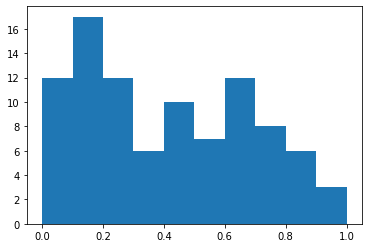

In [7]:
plt.hist(listofpercents, bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

In [8]:
type(dt['How old are you?'][36])

float

In [9]:
dt['Are you going actually going trick or treating yourself?'].nunique()

2

In [10]:
dt.shape #5630 * 124 the original

(5630, 124)

In [11]:
butter = dt[' [Butterfinger]'].dropna()
butter

0           JOY
1           JOY
2       DESPAIR
3           JOY
5           JOY
         ...   
5624    DESPAIR
5625    DESPAIR
5626        JOY
5628        JOY
5629    DESPAIR
Name:  [Butterfinger], Length: 5247, dtype: object

<AxesSubplot:>

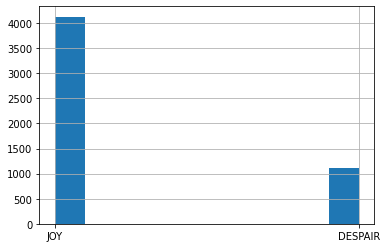

In [12]:
butter.hist()

In [13]:
butter.value_counts()

JOY        4129
DESPAIR    1118
Name:  [Butterfinger], dtype: int64

In [14]:
# joy occurence # DON'T USE INDEX 
butter.value_counts()[0]/sum(butter.value_counts())

0.7869258623975605

In [15]:
butter.value_counts()["JOY"]

4129

In [16]:
dt[' [Butterfinger]'].nunique()

2

In [17]:
NAamount = {}

dt.isna().sum()

Timestamp                                                                                           0
How old are you?                                                                                  199
Are you going actually going trick or treating yourself?                                            0
 [Butterfinger]                                                                                   383
 [100 Grand Bar]                                                                                  656
                                                                                                 ... 
Please estimate the degrees of separation you have from the following folks [Thom Yorke]         5630
Please estimate the degrees of separation you have from the following folks [JJ Abrams]          5630
Please estimate the degrees of separation you have from the following folks [Hillary Clinton]    5630
Please estimate the degrees of separation you have from the following folks [Donal

In [18]:
NAs = dt.isna().sum()
NAs.keys()[0]

'Timestamp'

In [19]:
for num in range(len(dt.isna().sum())):
    print(NAs.keys()[num],NAs[num])

Timestamp 0
How old are you? 199
Are you going actually going trick or treating yourself? 0
 [Butterfinger] 383
 [100 Grand Bar] 656
 [Anonymous brown globs that come in black and orange wrappers] 298
 [Any full-sized candy bar] 277
 [Black Jacks] 991
 [Bonkers] 1182
 [Bottle Caps] 596
 [Box’o’ Raisins] 404
 [Brach products (not including candy corn)] 698
 [Bubble Gum] 459
 [Cadbury Creme Eggs] 378
 [Candy Corn] 394
 [Vials of pure high fructose corn syrup, for main-lining into your vein] 561
 [Candy that is clearly just the stuff given out for free at restaurants] 366
 [Cash, or other forms of legal tender] 303
 [Chiclets] 508
 [Caramellos] 597
 [Snickers] 290
 [Dark Chocolate Hershey] 370
 [Dental paraphenalia] 336
 [Dots] 493
 [Fuzzy Peaches] 655
 [Generic Brand Acetaminophen] 532
 [Glow sticks] 460
 [Broken glow stick] 350
 [Goo Goo Clusters] 900
 [Good N' Plenty] 583
 [Gum from baseball cards] 444
 [Gummy Bears straight up] 430
 [Creepy Religious comics/Chick Tracts] 335
 [Healthy

In [20]:
def allnans(df):
    return df if type(df)==int else None

In [21]:
#dt['How old are you?'] = dt['How old are you?'].apply(allnans)
dt['How old are you?'] = dt['How old are you?'].dropna()
dt['How old are you?'].shape


(5630,)

In [22]:
dt['How old are you?'][57]

'enough'

In [23]:
ages = dt['How old are you?'].dropna()

In [24]:
ages.head()


0    35
1    41
2    33
3    31
4    30
Name: How old are you?, dtype: object

In [25]:
correctages = dt[pd.to_numeric(dt['How old are you?'], errors='coerce').notnull()]

In [26]:
correctages.shape

(5346, 124)

In [27]:
correctages = pd.to_numeric(correctages["How old are you?"])

In [28]:
correctages 

0       35.0
1       41.0
2       33.0
3       31.0
4       30.0
        ... 
5625    50.0
5626    43.0
5627    35.0
5628    38.0
5629    44.0
Name: How old are you?, Length: 5346, dtype: float64

In [ ]:
correctages

In [ ]:
zscores = actualages
zscores['z_score']=stats.zscore(zscores['How old are you?'])

C:\Users\lowde\AppData\Local\Temp/ipykernel_5952/3179182728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zscores['z_score']=stats.zscore(zscores['How old are you?'])


In [ ]:
zscores['z_score']=stats.zscore(zscores['How old are you?'])

C:\Users\lowde\AppData\Local\Temp/ipykernel_5952/1136934107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zscores['z_score']=stats.zscore(zscores['How old are you?'])


In [ ]:
zscores

NameError: name 'zscores' is not defined

In [ ]:
zscores.loc[zscores['z_score'].abs()>3]

,How old are you?,z_score
464,75.00,3.295659
680,74.00,3.209207
681,74.00,3.209207
888,72.00,3.036302
1130,99.00,5.370517
1279,72.00,3.036302
1287,72.00,3.036302
1561,77.00,3.468564
1564,74.00,3.209207
1569,75.00,3.295659


In [ ]:
correctages

,How old are you?
0,35.0
1,41.0
2,33.0
3,31.0
4,30.0
...,...
5625,50.0
5626,43.0
5627,35.0
5628,38.0
